# Problem 1: Double Pendulum

## Solved Using Lagrangian Method

### Physics 5700 Final, Spring 2021
### Alex Bumgarner.187

## Part 1: Python Setup:

Here, I import the packages needed for the rest of the notebook:

In [1]:
%matplotlib inline

from IPython.display import Image #Allows us to display images from the web

import numpy as np #For our more complicated math

from scipy.integrate import solve_ivp #Allows us to solve first-order ODE's

import matplotlib.pyplot as plt #For plotting

from matplotlib import animation, rc
from IPython.display import HTML #For animating

## Part 2: Problem Setup:

In [2]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg')

**Fig. 1: Double Pendulum**

*Source: Wikimedia Commons*

   A mass $m_1$ is attached to the ceiling by a massless rope of length $L_1$. A second mass $m_2$ is attached to the first mass by a massless string of length $m_2$, forming the double pendulum shown in Fig. 1. Our goal is to predict the motion of these two masses given a set of initial conditions. 

We define our Cartesian axes such that $\hat{x}$ points to the *right* and $\hat{y}$ points *up*.

## Part 3: Solving the Euler-Lagrange Equations

The Lagrangian is defined as $\mathscr{L} = T - U$, where $T$ is the kinetic energy and $U$ is the potential energy of the system. We will define these energies in terms of our general coordinates $\theta_1$ and $\theta_2$

Assuming $m_1$ is $h_1$ high off the ground when $\theta_1 = 0$, the height of $m_1$ is equal to $h_1 + L_1 - L_1\cos{\theta_1}$. Thus, the potential energy of $m_1$ is given by: $$U_1 = m_1 g [L_1 (1-\cos{\theta_1})+ h_1]$$

Assuming $m_2$ is $h_2$ high ff the ground with $\theta_1 = \theta_2 = 0$, the height of $m_2$ is given by $h_1 + L_1 - L_1\cos{\theta_1} + h_2 + L_2 - L_2\cos{\theta_2}$. Thus, the potential energy of $m_2$ is given by:

$$U_2 = m_2 g [L_1 (1-\cos{\theta_1}) + h_1 + L_2 (1-\cos{\theta_2})+h_2]$$

Summing these two potential energies (and omitting the $h$'s, as they will "disappear" when differentiating), we get an expression for the total potential energy:

$$U = (m_1 + m_2) g L_1 (1-\cos{\theta_1}) + m_2 g L_2 (1-\cos{\theta_2})$$

The kinetic energy of $m_1$ is given by $\frac{1}{2} m_1 v_1^2$, where $v_1$ is the *magnitdue* of the mass's velocity. $v_1 = L_1 \dot{\theta_1}$, so the kinetic energy is:

$$ T_1 = \frac{1}{2} m_1 L_1^2 \dot{\theta_1}^2 $$

The kinetic energy of $m_2$ is given by $\frac{1}{2} m_2 v_2^2$. 

Like $m_1$, $m_2$ moves with a tangential velocity $L_2 \dot{\theta_2}$. However, it is also affected by the velocity of $m_1$. As such, we must find the velocity of $m_2$ in each Carteian direction and add them in quadreture to get the magnitude.

In the x-direction, the velocity is $v_2,x = L_1 \dot{\theta_1} \cos{\theta_1} + L_2 \dot{\theta_2} \cos{\theta_2}$

In the y-direction, the velocity is $v_2,y = L_1 \dot{\theta_1} \sin{\theta_1} + L_2 \dot{\theta_2} \sin{\theta_2}$

Thus, the kinetic energy of $m_2$ is given by:

$$T_2 = \frac{1}{2} m_2 [(L_1 \dot\theta_1 \cos{\theta_1} + L_2 \dot\theta_2 \cos{\theta_2})^2 + (L_1 \dot\theta_1 \sin{\theta_1} + L_2 \dot\theta_2 \sin{\theta_2})^2]$$

This can be expanded and simplified:

$$T_2 = \frac{1}{2} m_2 (L_1^2 \dot\theta_1^2 +L_2^2 \dot\theta_2^2 + 2 L_1 L_2 \dot\theta_1 \dot\theta_2 (\sin{\theta_1} \sin{\theta_2} + \cos{\theta_1} \cos{\theta_2}))$$

$$T_2 = \frac{1}{2} m_2 (L_1^2 \dot\theta_1^2 +L_2^2 \dot\theta_2^2 + 2 L_1 L_2 \dot\theta_1 \dot\theta_2 \cos{(\theta_1-\theta_2))}$$

Summing these energies gives us the total kinetic energy of the system:

$$ T = \frac{1}{2}(m_1 + m_2) L_1^2 \dot\theta_1^2 + \frac{1}{2} m_2 L_2^2 \dot\theta_2^2 +  m_2 L_1 L_2 \dot\theta_1 \dot\theta_2 \cos{(\theta_1 - \theta_2)}$$

Thus, the Lagrangian $\mathscr{L} = T - U$ is given by:

$$\mathscr{L} = \frac{1}{2}(m_1 + m_2) L_1^2 \dot\theta_1^2 + \frac{1}{2} m_2 L_2^2 \dot\theta_2^2 +  m_2 L_1 L_2 \dot\theta_1 \dot\theta_2 \cos{(\theta_1 - \theta_2)} - (m_1 + m_2) g L_1 (1-\cos{\theta_1}) - m_2 g L_2 (1-\cos{\theta_2})$$

The Euler-Lagrange equations for our generalized variables, $\theta_1$ and $\theta_2$, are:

$$\frac{d}{dt} (\frac{\partial\mathscr{L}}{\partial \dot\theta_1}) = \frac{\partial\mathscr{L}}{\partial\theta_1}  $$

$$\frac{d}{dt} (\frac{\partial\mathscr{L}}{\partial \dot\theta_2}) = \frac{\partial\mathscr{L}}{\partial\theta_2}  $$

Plugging in our Lagrangian and simplifying gives us:

$$ \ddot\theta_1 (m_1+m_2) L_1 + m_2 L_2 \ddot\theta_2 \cos(\theta_1 - \theta_2) + \dot\theta_2^2 m_2 L_2 \sin(\theta_1 - \theta_2) = -(m_1 + m_2) g \sin(\theta_1)$$

$$ \ddot\theta_2 m_2 L_2 + m_2 L_1 \ddot\theta_1 \cos(\theta_1-\theta_2) -m_2 L_1 \dot\theta_1^2 \sin(\theta_1 - \theta_2) = -m_2 g \sin(\theta_2) $$

To solve with scipy, we need these as first-order ordinary differential equations. We rewrite the above equations using $z_i = \dot\theta_i$ and $\dot{z_i} = \ddot\theta_i$. Solving for $\dot z_1$ and $\dot z_2$, we get:

$$ \dot{z_1} = \frac{-(m_1+m2)g\sin(\theta_1) - m_2 \sin(\theta_1 - \theta_2) (L_2 z_2^2 + L_1 z_1^2 \cos(\theta_1 - \theta_2)) + g m_2 \cos(\theta_1 - \theta_2) \sin(\theta_2)}{L_1 (m_1 + m_2 \sin^2(\theta_1 - \theta_2))}$$

$$ \dot{z_2} = \frac{(m_1 + m_2) [g \cos(\theta_1 - \theta_2) \sin(\theta_1) + L_1 z_1^2 \sin(\theta_1 - \theta_2) - g \sin(\theta_2)] + L_2 m_2 z_2^2 \cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2)}{L_2 (m_1 + m_2 \sin^2(\theta_1 - \theta_2))}$$

## Part 4: Solving for the Motion 

*The following is largely adapted from the Lagrangian_pendulum.ipynb notebook provided in class*

We now want to solve our system of differntial equations and plot the course of the masses given initial conditions:

In [3]:
class Pendulum():
    """
    This class creates and solves for the motion of a pendulum of two masses using Lagrange's equations
    
    Parameters
    ------------
    L1: float
        length of first pendulum
    L2: float 
        length of second pendulum
    m1: float
        mass of first object
    m2: float
        mass of second object
    g:  float
        gravitational acceleration at the Earth's surface
    """
    
    def __init__(self, L1 = 1., L2 = 1., m1 = 1., m2 = 1., g = 1.):
        """
        Initializes the pendulum and provides default values if none are provided by user
        """
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
        
    def dy_dt(self,t,y):
        """
        Inputs a four component vector y[theta1,theta1dot,theta2,thetadot2] and 
         outputs the time derivative of each component
        """
        
        theta1 = y[0]
        theta1dot = y[1]
        theta2 = y[2]
        theta2dot = y[3]
        
        z1 = theta1dot #We defined these in the last section to get 1st order ODE's
        z2 = theta2dot
        
        #Below, a handful of common functions to simplify formula input (thanks for the idea!)
        c = np.cos(theta1-theta2) 
        s = np.sin(theta1-theta2)
        denom = (self.m1 + self.m2*s**2)
        
        #Now, the equations from above:
        z1_dot = (-(self.m1 + self.m2)*g*np.sin(theta1)-self.m2*s*(self.L2*z2**2 + self.L1*z1**2 * c)+self.g*self.m2*c*np.sin(theta2))/(self.L1*denom)
        z2_dot = ((self.m1+self.m2)*(self.g*c*np.sin(theta1)+self.L1*z1**2 *s - g*np.sin(theta2))+self.L2*self.m2*z2**2 *c*s)/(self.L2*denom) 
        
        return(z1,z1_dot,z2,z2_dot)
    
    def solve_ode(self, t_pts, theta1_0, theta1dot_0, theta2_0, theta2dot_0, abserr=1.0e-10,relerr = 1.0e-10):
        """
        As the name suggests, this function inputs initial values for each theta and theta dot and solves the ODE along the specified t_pts
        """
        
        #initial position y-vector:
        y = [theta1_0, theta1dot_0, theta2_0, theta2dot_0]
        
        #Below, we use the solve_ivp function to solve for the motion over our set of t_pts
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y, t_eval=t_pts, atol = abserr, rtol = relerr)
        theta1, theta1dot, theta2, theta2dot = solution.y
        
        return(theta1,theta1dot,theta2,theta2dot)
    

Now, a few plotting functions:

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Simple plot of points y vs. points x, found in Lagrangian_pendulum.ipynb
    """
    if ax is None:      
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:   
        ax.legend()
    if title is not None:    
        ax.set_title(title)
    if axis_labels is not None:  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  
    return start_index, stop_index

Finally, some labels for our plots:

In [6]:
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')

## Part 5: Plotting the Motion

Below, we'll make some representative plots of the motion for various parameters and initial conditions:

In [7]:
# Define plotting time
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#### Pendulum 1: Basic parameters, initially at rest

In [8]:
#Parameters:
L1 = 1.0
L2 = 1.0
m1 = 1.0
m2 = 1.0
g = 1.0

#Initial conditions:
theta1_0 = np.pi/2
theta1dot_0 = 0.0
theta2_0 = np.pi
theta2dot_0 = 0.0

#Create the pendulum:
p1 = Pendulum(L1,L2,m1,m2,g) 

theta1, theta1dot, theta2, theta2dot = p1.solve_ode(t_pts,theta1_0,theta1dot_0,theta2_0,theta2dot_0)

(<matplotlib.axes._subplots.AxesSubplot at 0x21d0551e190>,
 <matplotlib.lines.Line2D at 0x21d05c18b50>)

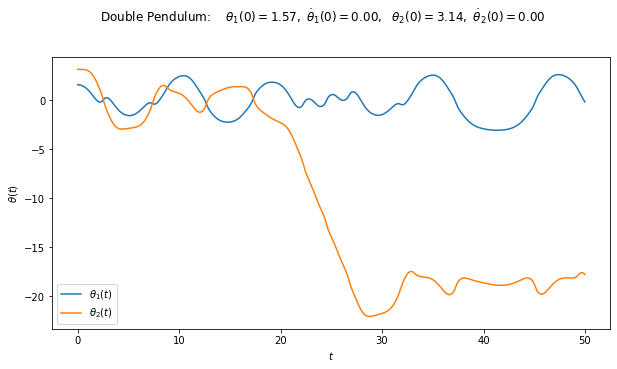

In [9]:
fig = plt.figure(figsize = (10,5))
overall_title = 'Double Pendulum:  ' + \
                rf'  $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1dot_0:.2f},$' + \
                rf'  $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2dot_0:.2f}$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start:stop],theta1[start:stop],
            axis_labels = theta_vs_time_labels,
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start:stop],theta2[start:stop],
            axis_labels = theta_vs_time_labels,
            label = r'$\theta_2(t)$',
            ax = ax_a)

Here, we see the first mass stays fairly close to its initial conditions, while the second mass moves around for a bit then abruptly makes multiple full rotations before settling down, again.

#### Pendulum 2: Basic parameters, begin by pulling back and releasing bottom mass

In [10]:
#Parameters:
L1 = 1.0
L2 = 1.0
m1 = 1.0
m2 = 1.0
g = 1.0

#Initial conditions:
theta1_0 = 0
theta1dot_0 = 0.0
theta2_0 = np.pi/4
theta2dot_0 = 0.0

#Create the pendulum:
p2 = Pendulum(L1,L2,m1,m2,g) 

theta1, theta1dot, theta2, theta2dot = p2.solve_ode(t_pts,theta1_0,theta1dot_0,theta2_0,theta2dot_0)

(<matplotlib.axes._subplots.AxesSubplot at 0x21d06eaec70>,
 <matplotlib.lines.Line2D at 0x21d06ef62e0>)

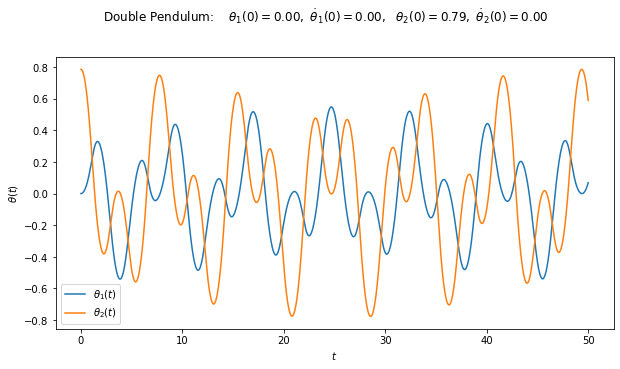

In [11]:
fig = plt.figure(figsize = (10,5))
overall_title = 'Double Pendulum:  ' + \
                rf'  $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1dot_0:.2f},$' + \
                rf'  $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2dot_0:.2f}$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start:stop],theta1[start:stop],
            axis_labels = theta_vs_time_labels,
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start:stop],theta2[start:stop],
            axis_labels = theta_vs_time_labels,
            label = r'$\theta_2(t)$',
            ax = ax_a)

While neither mass appears periodic, they both stay quite close to their initial starting positions, never making full rotations.

#### Pendulum 3: $m_2 > m_1$

In [12]:
#Parameters:
L1 = 1.0
L2 = 1.0
m1 = 1.0
m2 = 10.0
g = 1.0

#Initial conditions (same as Pendulum 1):
theta1_0 = np.pi/2
theta1dot_0 = 0.0
theta2_0 = np.pi
theta2dot_0 = 0.0

#Create the pendulum:
p3 = Pendulum(L1,L2,m1,m2,g) 

theta1, theta1dot, theta2, theta2dot = p3.solve_ode(t_pts,theta1_0,theta1dot_0,theta2_0,theta2dot_0)

(<matplotlib.axes._subplots.AxesSubplot at 0x21d0710e220>,
 <matplotlib.lines.Line2D at 0x21d05524460>)

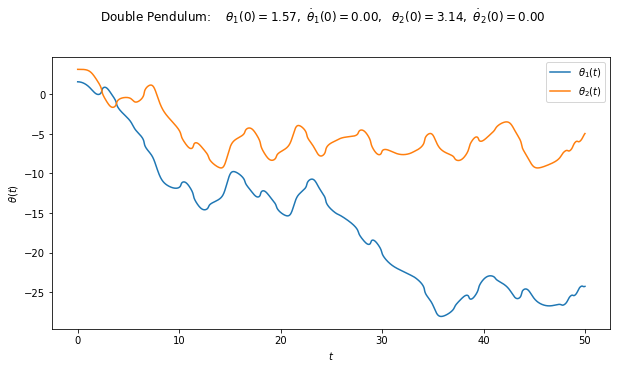

In [13]:
fig = plt.figure(figsize = (10,5))
overall_title = 'Double Pendulum:  ' + \
                rf'  $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1dot_0:.2f},$' + \
                rf'  $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2dot_0:.2f}$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start:stop],theta1[start:stop],
            axis_labels = theta_vs_time_labels,
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start:stop],theta2[start:stop],
            axis_labels = theta_vs_time_labels,
            label = r'$\theta_2(t)$',
            ax = ax_a)

In this case, both masses make full rotations, with the first mass making multiple rotations before finally settling down.

## Part 6: Investigating Chaos

Some of the signature features of chaotic system include a lack of periodicity and an exponential sensitivity to initial conditions. In this section, I show that the double pendulum is chaotic for initial conditions outside of the small-angle approximation.

We'll start by initializing a pendulum with fairly large initial angles:

In [14]:
#Parameters:
L1 = 1.0
L2 = 1.0
m1 = 1.0
m2 = 1.0
g = 1.0

#Initial conditions (same as Pendulum 1):
theta1_0 = np.pi/4
theta1dot_0 = 0
theta2_0 = np.pi
theta2dot_0 = 0.0

#Create the pendulum:
p4 = Pendulum(L1,L2,m1,m2,g) 

theta1, theta1dot, theta2, theta2dot = p4.solve_ode(t_pts,theta1_0,theta1dot_0,theta2_0,theta2dot_0)

(<matplotlib.axes._subplots.AxesSubplot at 0x21d070da640>,
 <matplotlib.lines.Line2D at 0x21d0717e8b0>)

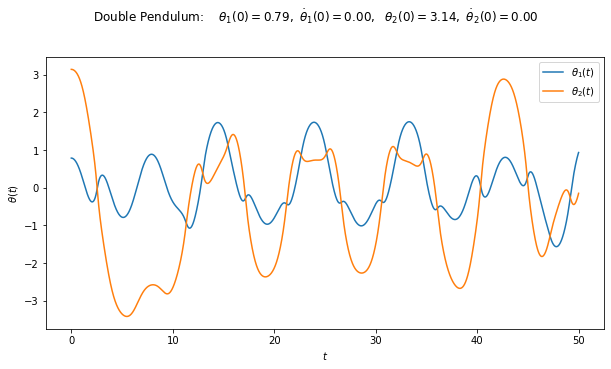

In [15]:
fig = plt.figure(figsize = (10,5))
overall_title = 'Double Pendulum:  ' + \
                rf'  $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1dot_0:.2f},$' + \
                rf'  $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2dot_0:.2f}$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start:stop],theta1[start:stop],
            axis_labels = theta_vs_time_labels,
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start:stop],theta2[start:stop],
            axis_labels = theta_vs_time_labels,
            label = r'$\theta_2(t)$',
            ax = ax_a)

Already, it appears that neither mass is periodic with time, indicating chaos. However, we need a bit more evidence. 

Below, we'll plot the state space plot of each mass with respect to time. If either plot closes on itself, the mass's motion is periodic.

In [16]:
state_space_labels = (r'$\theta$', r'$d\theta/dt$') #New labels for comparing thetadot to theta

(<matplotlib.axes._subplots.AxesSubplot at 0x21d084e3d00>,
 <matplotlib.lines.Line2D at 0x21d0855eaf0>)

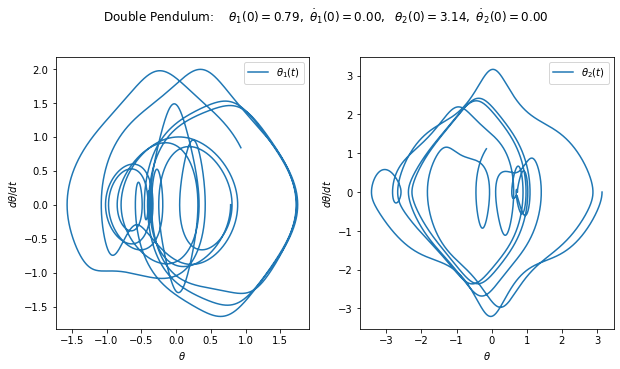

In [17]:
fig = plt.figure(figsize = (10,5))
overall_title = 'Double Pendulum:  ' + \
                rf'  $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1dot_0:.2f},$' + \
                rf'  $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2dot_0:.2f}$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,2,1) #1 row, 2 columns, position 1
ax_b = fig.add_subplot(1,2,2) #1 row, 2 columns, position 2

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(theta1[start:stop],theta1dot[start:stop],
            axis_labels = state_space_labels,
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(theta2[start:stop],theta2dot[start:stop],
            axis_labels = state_space_labels,
            label = r'$\theta_2(t)$',
            ax = ax_b)

As expected, neither plot closes on itself, indicating that the motion is chaotic. B

As a final check for chaos, we'll plot the difference between each $\theta$ for two pendulums with *almost* identical initial positions. In other words, we will create a second pendulum with initial conditions only slighly different than the first. If the difference between respective $\theta$ increases exponentially with time, we have a chaotic system.

In [18]:
# Our first pendulum is p4, created above. Here, we create the slightly different pendulum:

#Parameters:
L1 = 1.0
L2 = 1.0
m1 = 1.0
m2 = 1.0
g = 1.0

#Initial conditions (slightly different than Pendulum 4):
theta1_0 = np.pi/4 + 0.001
theta1dot_0 = 0
theta2_0 = np.pi + 0.001
theta2dot_0 = 0.0

#Create the pendulum:
p5 = Pendulum(L1,L2,m1,m2,g) #This is one of the benefits of the Pendulum class, we can make multiple pendulums and compare them

theta1_diff, theta1dot_diff, theta2_diff, theta2dot_diff = p5.solve_ode(t_pts,theta1_0,theta1dot_0,theta2_0,theta2dot_0)

In [19]:
#Labels for our new plots:
delta_labels = (r'$t$', r'$\Delta\theta$')

In [20]:
#Define variables to plot, the difference between each theta
diff1 = np.abs(theta1-theta1_diff)
diff2 = np.abs(theta2-theta2_diff)

(<matplotlib.axes._subplots.AxesSubplot at 0x21d08588f40>,
 <matplotlib.lines.Line2D at 0x21d07198820>)

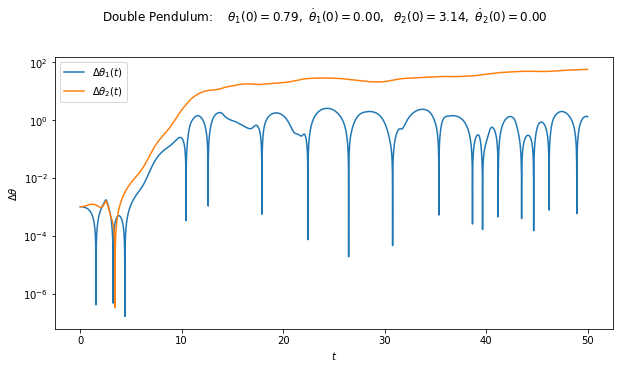

In [21]:
#Plot our functions:

fig = plt.figure(figsize = (10,5))
overall_title = 'Double Pendulum:  ' + \
                rf'  $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1dot_0:.2f},$' + \
                rf'  $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2dot_0:.2f}$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1) #1 row, 1 columns, position 1


start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start:stop],diff1[start:stop],
            axis_labels = delta_labels,
            label = r'$\Delta\theta_1(t)$',
            semilogy = True, #Semi log plot 
            ax = ax_a)
plot_y_vs_x(t_pts[start:stop],diff2[start:stop],
            axis_labels = delta_labels,
            label = r'$\Delta\theta_2(t)$',
            semilogy = True, #Semi log plot
            ax = ax_a)

As expected, both masses change exponentially with even small deviations in $\theta_0$, indicating a chaotic system. The erratic behavior and leveling off at ~t = 10 can be attributed to round-off error by the computer. This can be altered by making the error level on the scipy solver smaller, though it takes much more computing power.

## Part 7: Animations!

We'll start by creating a double pendulum to animate with some simple parameters:

In [22]:
# Define plotting time
t_start = 0.
t_end = 49.
delta_t = 0.5  #We're plotting fewer points to minimize computing time on the animation

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#Parameters:
L1 = 1.0
L2 = 1.0
m1 = 1.0
m2 = 1.0
g = 1.0

#Initial conditions:
theta1_0 = np.pi/2
theta1dot_0 = 0.0
theta2_0 = np.pi
theta2dot_0 = 0.0

#Create the pendulum:
p6 = Pendulum(L1,L2,m1,m2,g) 

theta1, theta1dot, theta2, theta2dot = p6.solve_ode(t_pts,theta1_0,theta1dot_0,theta2_0,theta2dot_0)

Now, we'll write x and y as functions of $\theta_1$ and $\theta_2$, defining the origin at the point where the top string meets the wall, with x pointing right and y pointing up:

In [23]:
x1 = L1*np.sin(theta1)
y1 = -L1*np.cos(theta1)
x2 = L1*np.sin(theta1) + L2*np.sin(theta2)
y2 = -L1*np.cos(theta1) + L2*np.cos(theta2)

As a check, here is a plot of each angle with respect to time:

(<matplotlib.axes._subplots.AxesSubplot at 0x21d054d5f70>,
 <matplotlib.lines.Line2D at 0x21d095fc820>)

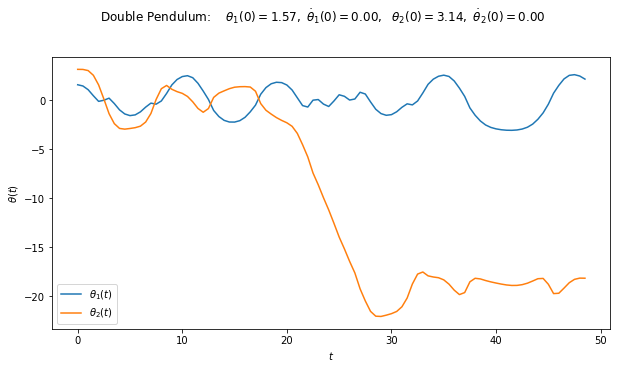

In [24]:
fig = plt.figure(figsize = (10,5))
overall_title = 'Double Pendulum:  ' + \
                rf'  $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1dot_0:.2f},$' + \
                rf'  $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2dot_0:.2f}$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(t_pts[start:stop],theta1[start:stop],
            axis_labels = theta_vs_time_labels,
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start:stop],theta2[start:stop],
            axis_labels = theta_vs_time_labels,
            label = r'$\theta_2(t)$',
            ax = ax_a)

Now, we'll begin the actual animating:

*The following is largely adapted from wave_animation_1.ipynb*

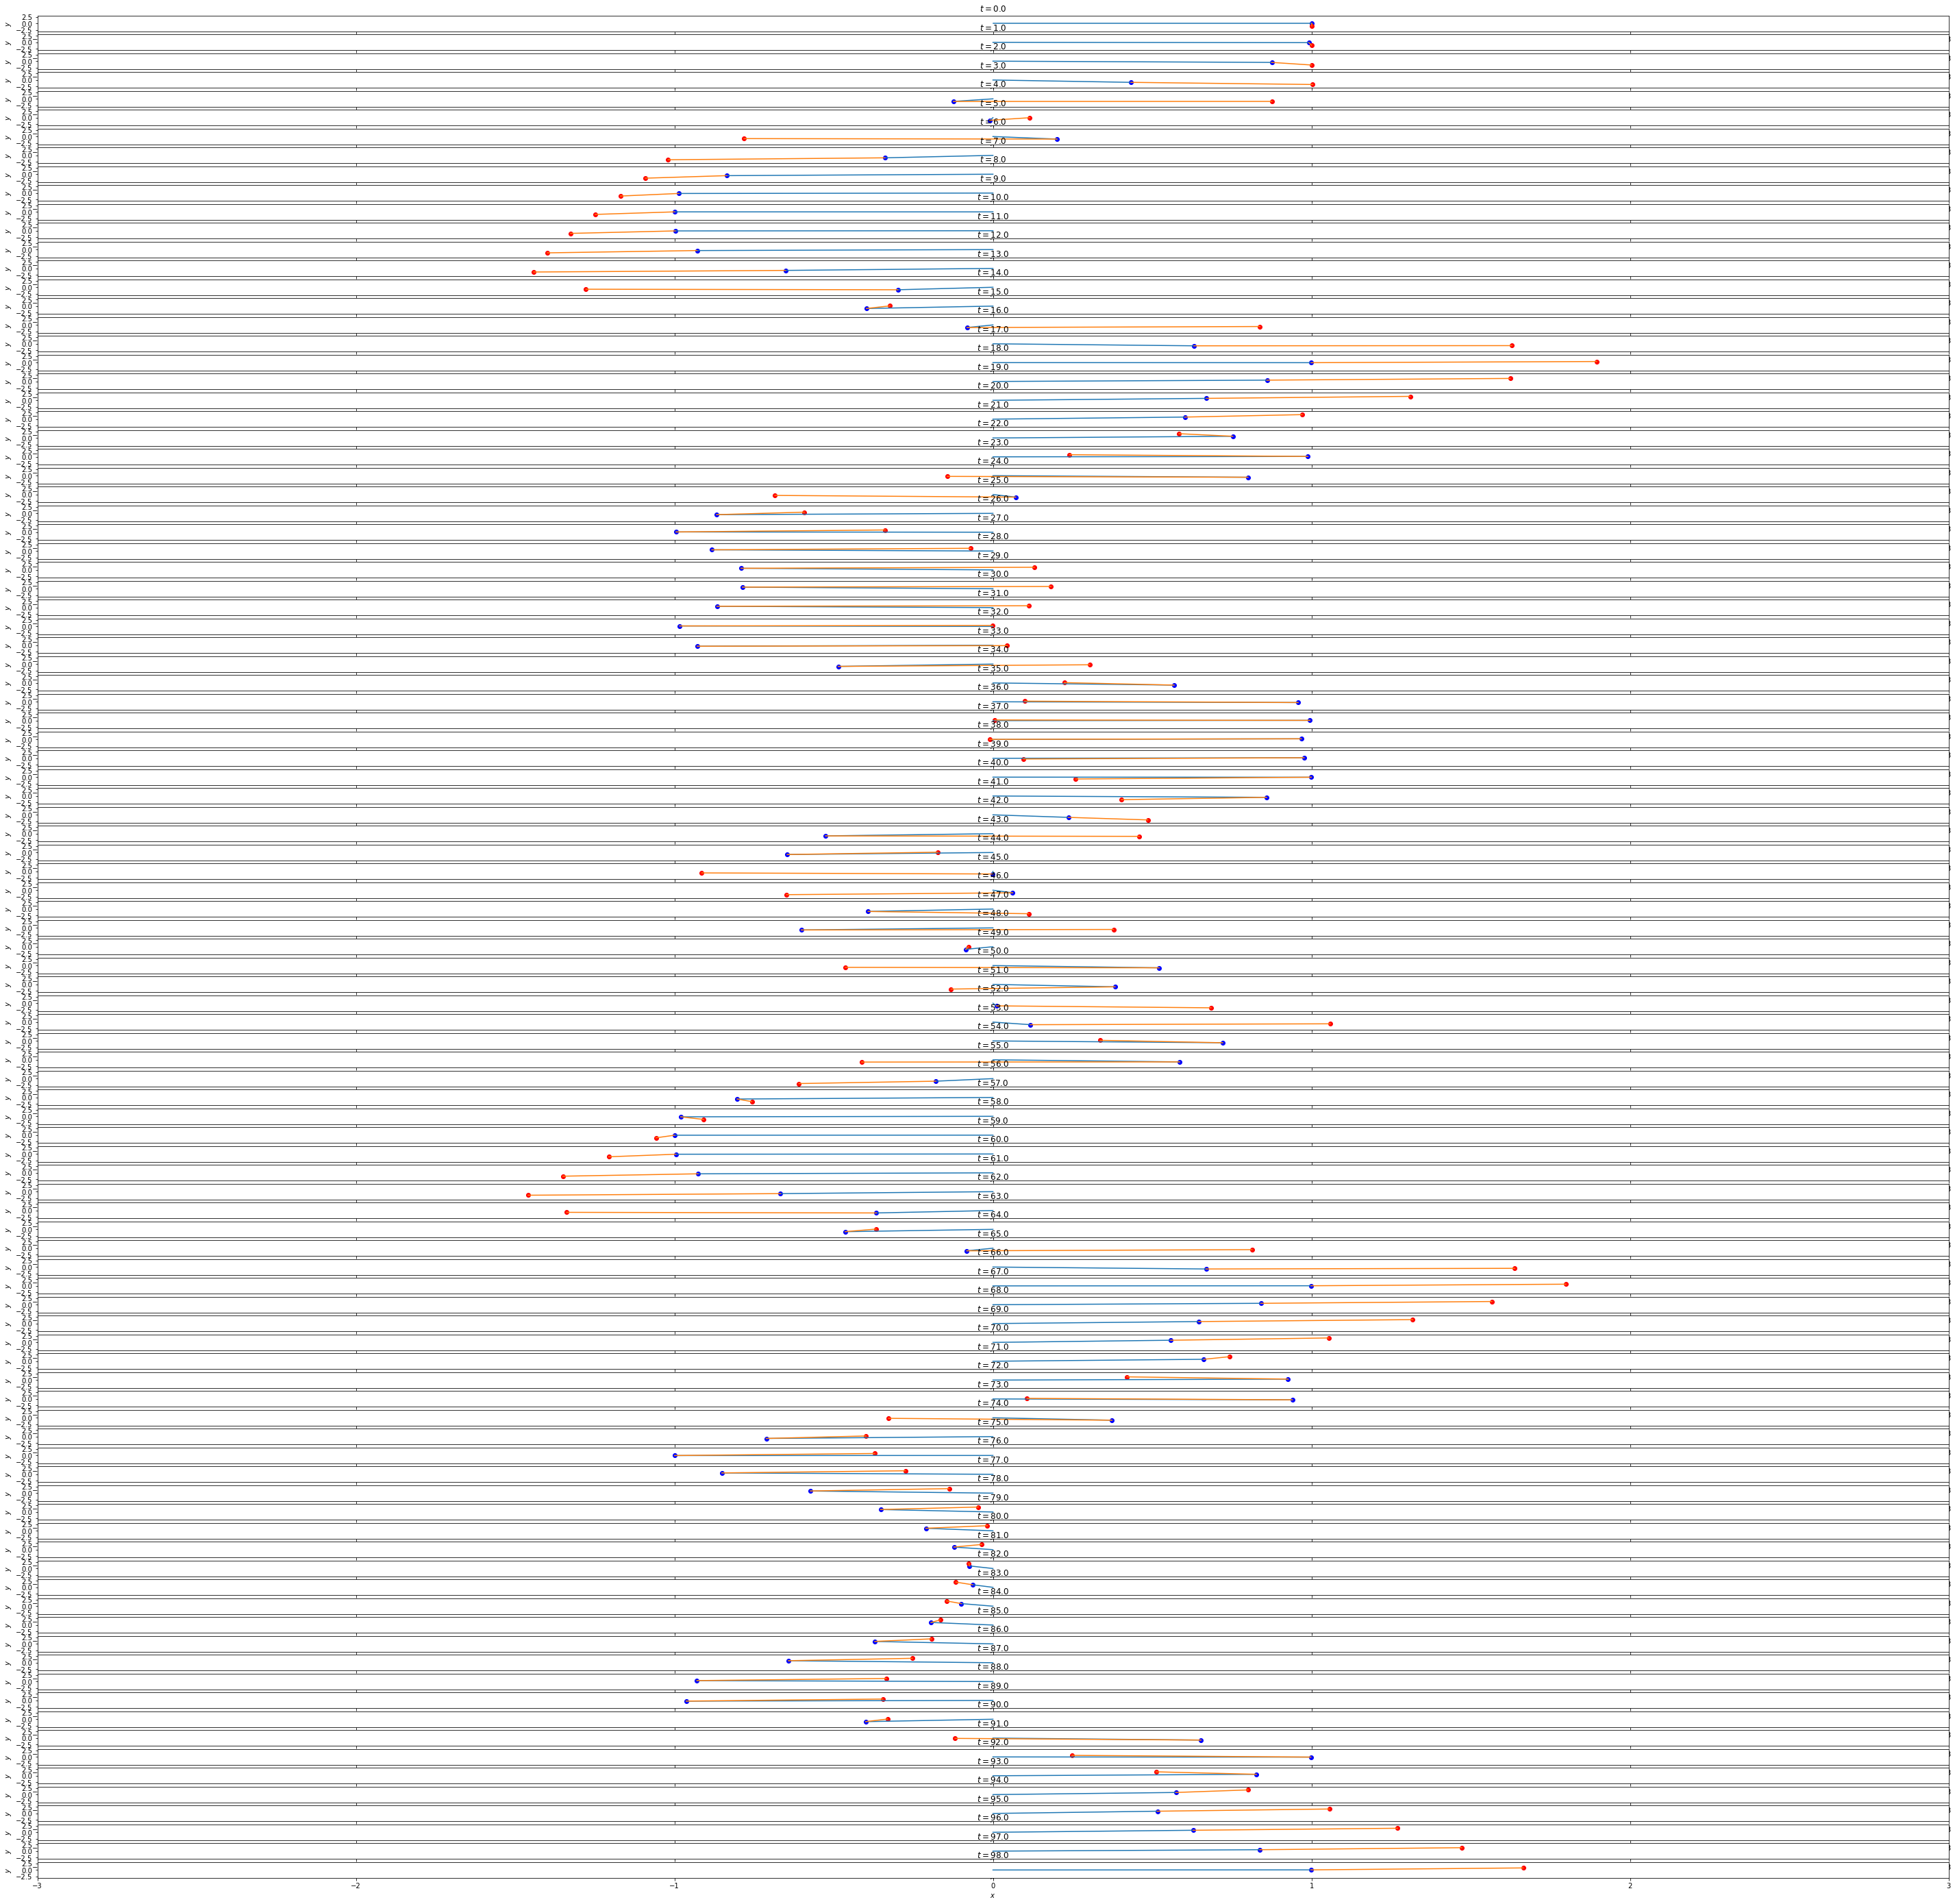

In [25]:
#The limits on our plot:
x_min = -L1-L2-1
x_max = L1+L2+1
y_min = -L1-L2-1
y_max = L1+L2+1


#Create an array of plots:
fig_array = plt.figure(figsize=(50,50))


for i in range(0,len(t_pts)):
    ax_array = fig_array.add_subplot(len(t_pts), 1, i+1)
    ax_array.set_xlim(x_min, x_max)
    ax_array.set_ylim(y_min, y_max)
    ax_array.set_xlabel(r'$x$')
    ax_array.set_ylabel(r'$y$')
    ax_array.set_title(rf'$t = {i:.1f}$')
    

    ax_array.plot(x1[i], y1[i], 'bo')           #Mass 1
    ax_array.plot(x2[i], y2[i], 'ro')           #Mass 2
    ax_array.plot([0,x1[i]],[0,y1[i]])          #Line connecting origin to Mass 1
    ax_array.plot([x1[i],x2[i]],[y1[i],y2[i]])  #Line connecting Mass 1 to Mass 2
    


In [26]:
%%capture

fig_anim = plt.figure(figsize=(5,5))
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max) #Set the limits on our animation plot
ax_anim.set_ylim(y_min,y_max)

#Plot the first point of the animation, will be updated in function animate_pendulum
line_anim, = ax_anim.plot(x1[0],y1[0], 'bo')
line_anim_2, = ax_anim.plot(x2[0],y2[0], 'ro')
line_anim_top, = ax_anim.plot([0,x1[0]],[0,y1[0]])
line_anim_bottom, = ax_anim.plot([x1[0],x2[0]],[y1[0],y2[0]])

fig_anim.tight_layout()

In [27]:
def animate_pendulum(i):
    """
    Called by FuncAnimation, this creates the plot at each frame, i. 
    """
    x_pts_1 = x1[i]
    y_pts_1 = y1[i] 
    x_pts_2 = x2[i]
    y_pts_2 = y2[i]

    line_anim.set_data(x_pts_1, y_pts_1)  # overwrite line_anim with new points
    line_anim_2.set_data(x_pts_2,y_pts_2)
    line_anim_top.set_data([0,x1[i]],[0,y1[i]])
    line_anim_bottom.set_data([x1[i],x2[i]],[y1[i],y2[i]])
    return ()   # this is needed for blit=True to work

In [28]:
frame_interval = 100.        # time between frames
frame_number = len(t_pts)    # number of frames to include (number of points in t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_pendulum, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

In [29]:
HTML(anim.to_jshtml())

In [30]:
#anim.save('pendulum.gif', writer = 'pillow')

#^^Uncomment to save the gif^^